# Import Libraries

In [12]:
import numpy as np
import datetime
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from astropy.io import ascii
from scipy import optimize
from scipy.optimize import curve_fit
import pandas as pd

# Reading the file and converting time stamps to total hours

In [13]:
data = ascii.read('dataset.txt')   # module to read data

#define empty arrays 
day=np.zeros(len(data))   
height=np.zeros(len(data))
time=np.zeros(len(data))
hours = np.zeros(len(data))
day_hours = np.zeros(len(data))

#fill arrays with data from file
for i in range(len(data)):
    day[i] = data[i][0]
    datetime_obj = datetime.strptime(data[i][1], "%H:%M")  #parse time define the hour and the minute
    hours[i] = datetime_obj.hour + datetime_obj.minute / 60     #add the minutes / 60 to the hours to get total hours
    day_hours[i] = day[i] + hours[i] / 24
    height[i] = data[i][2]

# Making the best fit line

In [14]:
time = np.linspace(1,78,82)  # create an array with 82 values
amplitude = 3.95
frequency = 0.5
phase = np.pi / -5

#best fit line functiom
bf_tide_height = (amplitude * np.sin(2 * np.pi * frequency * time + phase) + np.random.normal(scale=0.25, size=len(time))) + 2.7

# Plotting the data and best fit line

In [ ]:
def scatter_plot(x, y,
                 xlabel='Days',        # x-axis label
                 ylabel='Tide Height(ft)',        # y-axis label
                 lcolor='blue',      # line color
                 pcolor='black',     # point color
                 fs=14,):             # font size
    
    # Define a figure and axis
    f, ax = plt.subplots(1, 1, figsize=(20, 12))

    ax.grid(True)    #grid?

    # Making sure ticks go inward
    ax.xaxis.set_tick_params(which='major', direction='in')
    ax.yaxis.set_tick_params(which='major', direction='in')
    ax.xaxis.set_tick_params(which='minor', direction='in')
    ax.yaxis.set_tick_params(which='minor', direction='in')

    #Setting tick location on the x-axis
    ax.xaxis.set_major_locator(MultipleLocator(1.))
    ax.xaxis.set_minor_locator(MultipleLocator(0.3))

    #Setting tick location on the y-axis
    ax.yaxis.set_major_locator(MultipleLocator(1.))
    ax.yaxis.set_minor_locator(MultipleLocator(0.3))

    # Plot y vs. x and the best fit line
    ax.plot(x, y, color=lcolor, linewidth=1.5, linestyle='dashed', label='Tidal Movements')  # a line
    ax.plot(time, bf_tide_height, label='Best Fit', color='orange', linestyle='-')

    #make error bars
    yerr=0.25
    ax.errorbar(x,y,yerr=0.25,fmt='bo',capsize=6.0,ecolor='green')     # fmt = format = blue dot

    # Label our axes
    ax.set_xlabel(xlabel, fontsize=fs)
    ax.set_ylabel(ylabel, fontsize=fs)

    #Set axis limits
    ax.set_xlim(0, 42)
    ax.set_ylim(-2, 8)

    # Create a legend without a frame
    # in the upper left-hand corner
    ax.legend(loc='upper left', frameon=False)

    #plt.plot(x, y, ':', label='data')

    # if flag_save:
    #     plt.savefig(fname='group_graph.pdf', bbox_inches='tight', dpi=400)

print('Making a plot...')

    #define x: Day of the year
x_data = day_hours

    #define y: Tide Height
y_data = height

# make the plot
scatter_plot(x_data, y_data)

# save the figure
plt.savefig(fname='group_fin_graph.pdf', bbox_inches='tight', dpi=400)

Making a plot...


# Plotting the residuals 

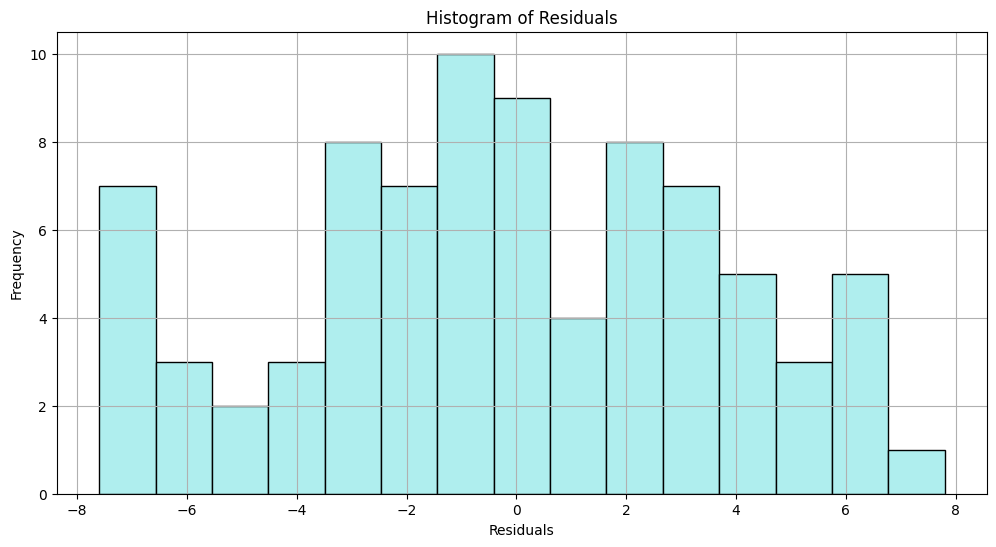

Standard Deviation of Residuals: 3.8421
Assumed Experimental Error: 0.25
The scatter in the data is larger than the assumed experimental error.
Intrinsic Scatter in the Data: 3.8340


In [8]:
#subtract best fit fn from the data to get residuals
residuals = y_data - bf_tide_height

# plot the residuals
plt.figure(figsize=(12, 6))
plt.hist(residuals, bins=15, color='paleturquoise', edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.grid(True)
plt.savefig('residuals_hist.pdf', bbox_inches='tight')
plt.show()

# calculate std of residuals
std_dev = np.std(residuals)
print(f"Standard Deviation of Residuals: {std_dev:.4f}")

# calculate the errors 
assumed_error = 0.25  # Assumed experimental error
print(f"Assumed Experimental Error: {assumed_error}")

# Check if scatter in the data is larger than assumed experimental error
if std_dev > assumed_error:
    print("The scatter in the data is larger than the assumed experimental error.")
else:
    print("The scatter in the data is in range of the assumed experimental error.")

# Estimate intrinsic scatter in the data after accounting for assumed measurement error
intrinsic_scatter = np.sqrt(std_dev**2 - assumed_error**2)
print(f"Intrinsic Scatter in the Data: {intrinsic_scatter:.4f}")

# Find and plot the outlier

In [9]:
std_normal_tide = np.std(residuals)

# 2ft outlier
outlier = 2.0
height_with_outlier = np.append(height, outlier)

# Generate time array for the outlier (one extra time point)
time_with_outlier = np.linspace(1, 79, 83)  # Adjust the length to match the extended dataset

# Recalculate the best fit tide height with the outlier
bf_tide_height_with_outlier = (amplitude * np.sin(2 * np.pi * frequency * time_with_outlier + phase)) + 2.7

# Ensure both arrays have the same length
if len(bf_tide_height_with_outlier) > len(height_with_outlier):
    bf_tide_height_with_outlier = bf_tide_height_with_outlier[:-1]

# Recalculate the residuals & STD with the outlier
residuals_with_outlier = height_with_outlier - bf_tide_height_with_outlier  # Calculate residuals directly
std_with_outlier = np.std(residuals_with_outlier)

# Calculate the deviation of the 2ft outlier in terms of standard deviations
tsunami_deviation_std = (outlier - np.mean(height)) / std_normal_tide

# Print deviation
print(f"The 2ft tsunami deviation in terms of standard deviations from the normal tide distribution: {tsunami_deviation_std:.2f}")

The 2ft tsunami deviation in terms of standard deviations from the normal tide distribution: -0.12


# Residuals with outlier

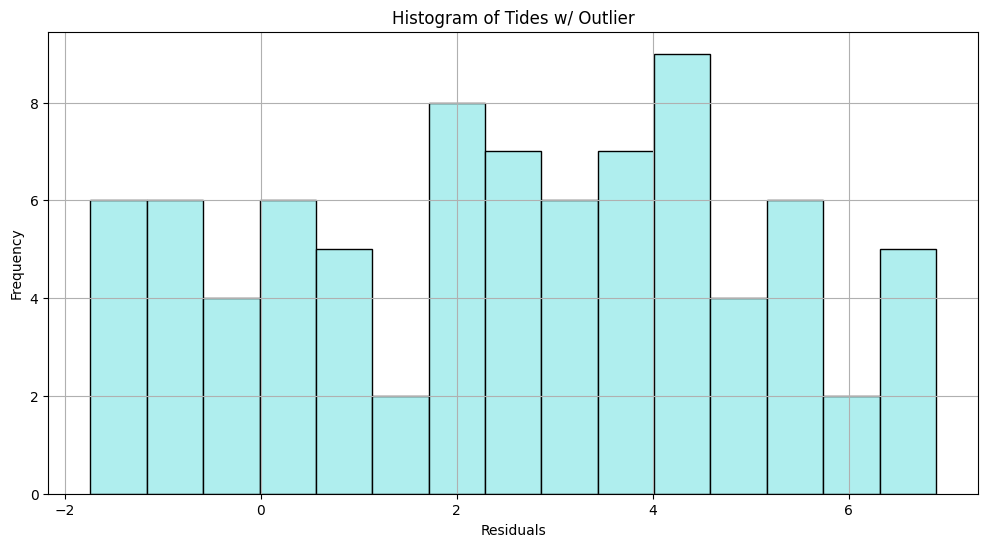

In [10]:
# Generate a new histogram with the outlier included
plt.figure(figsize=(12, 6))
plt.hist(height_with_outlier, bins=15, color='paleturquoise', edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Tides w/ Outlier')
plt.grid(True)
plt.savefig('tide_height_with_outlier.pdf', bbox_inches='tight')
plt.show()